In [322]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
import pickle
from xgboost import XGBRegressor



In [323]:
pip install scikit-learn==1.0 xgboost==1.5.1 pandas==1.3.4

In [324]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [482]:
##import dataset
df_broadband_tr = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/train_3.csv', encoding = 'ISO-8859-1')
df_broadband_test = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/test_3.csv', encoding = 'ISO-8859-1')


## Machine Learning Model for Broadband training dataset



In [483]:
df_broadband_tr = df_broadband_tr.set_index('tract_geoid')
df_broadband_test = df_broadband_test.set_index('tract_geoid')

In [484]:
df_broadband_tr.head()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
tract_geoid,,,,,,,,,,,,,,,,,,,,,
6099000201,0,11,1000.0,1000.0,4.0,4,4.0,7.0,3.0,3.0,...,11.172546,12.667918,59.341118,0.224165,100.000000,0.881956,68.284076,80.811645,14.292016,54.741950
47125102002,1,7,1000.0,1000.0,3.0,4,0.0,5.0,4.0,0.0,...,11.113224,12.048249,51.697764,0.392576,99.164439,0.922393,96.990074,93.948127,1.953250,79.090618
22019001300,2,8,1000.0,1000.0,3.0,4,2.0,4.0,2.0,0.0,...,11.162147,12.062779,66.303202,0.406313,100.000000,0.925338,84.889780,85.611222,6.012024,68.777555
18083955400,3,11,1000.0,1000.0,5.0,4,3.0,6.0,3.0,1.0,...,10.388995,11.202316,50.940439,0.443383,100.000000,0.927397,65.481172,75.418410,10.564854,52.301255
39085206600,4,7,1000.0,1000.0,3.0,4,0.0,4.0,2.0,0.0,...,10.900178,11.663928,51.507605,0.465916,98.464164,0.934520,74.532020,67.980296,2.463054,52.216749


In [485]:
df_broadband_tr.shape


(55826, 203)

In [486]:
df_broadband_test.shape

(13947, 203)

In [487]:
df_broadband_tr.describe()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
count,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,...,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000
mean,27912.500000,10.656719,957.897019,629.729030,5.527424,3.996417,1.333554,5.085337,2.999893,0.655573,...,10.999802,12.221700,60.508040,0.332359,99.516694,0.901661,75.911962,78.749925,7.615102,57.937991
std,16115.722401,3.058830,152.595259,438.285021,2.677041,0.068151,1.444999,1.390270,1.188782,0.929290,...,0.461022,0.740413,21.704515,0.165234,0.890079,0.037318,14.286054,9.791230,6.136955,12.524106
min,0.000000,3.000000,2.000000,0.512000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,8.325791,9.210240,5.894772,0.014433,72.222222,0.685061,2.603369,10.483871,0.000000,6.317411
25%,13956.250000,8.000000,987.000000,50.000000,4.000000,4.000000,0.000000,4.000000,2.000000,0.000000,...,10.702435,11.704372,45.899438,0.222456,99.256813,0.880425,67.133688,72.638049,2.963984,49.611084
50%,27912.500000,10.000000,1000.000000,940.000000,5.000000,4.000000,1.000000,5.000000,3.000000,0.000000,...,10.993580,12.161598,57.336393,0.321160,100.000000,0.906645,77.999462,79.719145,6.208054,58.320951
75%,41868.750000,12.000000,1000.000000,1000.000000,7.000000,4.000000,2.000000,6.000000,4.000000,1.000000,...,11.302621,12.718597,71.797508,0.417278,100.000000,0.926328,87.088051,86.081764,10.781179,67.021646
max,55825.000000,38.000000,1000.000000,1000.000000,29.000000,5.000000,17.000000,16.000000,11.000000,8.000000,...,12.429220,14.508658,707.617647,5.813081,100.000000,1.191104,100.000000,100.000000,45.263560,92.727273


In [488]:
df_broadband_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55826 entries, 6099000201 to 26125131800
Columns: 203 entries, Unnamed: 0 to pct_tablet
dtypes: float64(130), int64(72), object(1)
memory usage: 86.9+ MB


### Broadband Variables exploration

In [489]:
broadband_vars = ['MaxAdDown',
                 'MaxAdUp',
                 'Wired_Provider_Count',
                 'Satellite_Provider_Count',
                 'Fixed_Wireless_Provider_Count',
                 'All_Provider_Count_25',
                 'All_Provider_Count_100',
                 'Fixed_Wireless_Provider_Count_25',
                 'Wired_Provider_Count_25',
                 'Satellite_Provider_Count_25',
                 'Fixed_Wireless_Provider_Count_100',
                 'Wired_Provider_Count_100',
                 'Satellite_Provider_Count_100',
                 'pct_internet',
                 'pct_internet_dial_up',
                 'pct_internet_broadband_any_type',
                 'pct_internet_cellular',
                 'pct_only_cellular',
                 'pct_internet_broadband_fiber',
                 'pct_internet_broadband_satellite',
                 'pct_internet_only_satellite',
                 'pct_internet_other',
                 'pct_internet_no_subscrp',
                 'pct_internet_none',
                 'pct_computer',
                 'pct_computer_with_dialup',
                 'pct_computer_with_broadband',
                 'pct_computer_no_internet',
                 'pct_no_computer',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
                 'Ookla Median Download Speed (Mbps)',
                 'Ookla Median Upload Speed (Mbps)',
                 '0_5_providers',
                 '6_10_providers',
                 '11_15_providers',
                 '16_20_providers',
                 '20+_providers',
                 '0_25_MaxAdDown',
                 '25_99_MaxAdDown',
                 '99_499_MaxAdDown',
                 '499_inf_MaxAdDown',
                 '0_25_Ookla Median Download Speed (Mbps)',
                 '25_99_Ookla Median Download Speed (Mbps)',
                 '99_499_Ookla Median Download Speed (Mbps)',
                 '499_inf_Ookla Median Download Speed (Mbps)',
                 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'single_provider',
                 'SE',
                 'INFA',
                 'DDI',
                 'ruca_metro',
                 'ruca_micro',
                 'ruca_small_town',
                 'ruca_rural',
                 'Comcast_present',
                 'ATT_present',
                 'HughesNet_present',
                 'GCI_Comm_Corp_present',
                 'ViaSat_present',
                 'VSAT_present',
                 'Century_Link_present',
                 'Spectrum_present',
                 'Crown_Castle_present',
                 'Etheric_present',
                 'Frontier_Communications_present']

In [490]:
## get a list of numerical feature
numeric_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes == "float64"].index.values.tolist()
numeric_feats

['MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'state',
 'county',
 'tract',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_only_cellular',
 'pct_internet_

In [491]:
other_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes != "float64"].index.values.tolist()
other_feats

['Unnamed: 0',
 'All_Provider_Count',
 'Satellite_Provider_Count',
 'NAME',
 'ALAND',
 'AWATER',
 '0_5_providers',
 '6_10_providers',
 '11_15_providers',
 '16_20_providers',
 '20+_providers',
 '0_25_MaxAdDown',
 '25_99_MaxAdDown',
 '99_499_MaxAdDown',
 '499_inf_MaxAdDown',
 '0_25_Ookla Median Download Speed (Mbps)',
 '25_99_Ookla Median Download Speed (Mbps)',
 '99_499_Ookla Median Download Speed (Mbps)',
 '499_inf_Ookla Median Download Speed (Mbps)',
 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 'single_provider',
 'Primary RUCA Code - 1.0',
 'Primary RUCA Code - 2.0',
 'Primary RUCA Code - 4.0',
 'Primary RUCA Code - 10.0',
 'Primary RUCA Code - 7.0',
 'Primary RUC

### Train test split
linear regression on target variable = pct of high school degree + 

In [492]:
##drop some variables that are not numerical, highly correlated to dependent varible (bachelors degree)

to_drop = ['pct_pop_hs+','pct_pop_bachelors+', 'NAME','DDI','INFA','SE',
           'pct_pop_some_college','pct_internet_none', 'pct_pop_associates', 'pct_pop_ged'	]
target = ['pct_pop_hs+']

X = df_broadband_tr.drop(to_drop, axis = 'columns', inplace=False)
y = df_broadband_tr[target]

##split into train and test 80/20 random split
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [493]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [494]:
X_train_all.shape

(44660, 193)

### Broadband Variables Set 1&2

In [495]:
br_important_vars = ['pct_internet',
'pct_only_cellular',
'pct_computing_device_no_internet',
'pct_internet_broadband_satellite',
'pct_computing_device_with_broadband']


In [496]:
br_interest_vars = ['pct_internet',
  'All_Provider_Count_25',
  'All_Provider_Count_100',
  'Ookla Median Download Speed (Mbps)',
  'pct_computing_device',
  'pct_internet_broadband_any_type']


In [497]:
important_cov = ['log_median_income', 
                 'ruca_metro',
                 'ruca_rural',
                 'log_median_income_over_log_median_house',
                 'pct_pop_foreign_born',
                 'pct_pop_disability']

In [498]:
def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mae=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    r2=metrics.r2_score(y_test, y_pred)
    adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )


    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(mse**(1/2.0)))
    print('R2 score is {}'.format(r2))
    print('Adj R2 score is {}'.format(adj_r2))

### Baseline Model - log(median income)

In [499]:
#limit the dataset to only log(median income)

ind_var = ['log_median_income']
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]


In [500]:
## linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
## predict on x test 
y_pred = lr.predict(X_test)

In [501]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 8.94802099331186
MSE is 132.4111115283205
RMSE is 11.507002716968502
R2 score is 0.4630529011595057
Adj R2 score is 0.4536078783672878


### LR 1: Include all variables (except the ones dropped earlier)

In [502]:
## linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train_all, y_train_all)
## predict on x test 
y_pred = lr.predict(X_test_all)

In [503]:
## look at coeffcients
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":lr.coef_[0]})

,Feature,Coefficients
0,Unnamed: 0,-8.938807e-07
1,All_Provider_Count,2.752363e-01
2,MaxAdDown,2.082550e-03
3,MaxAdUp,-6.239967e-05
4,Wired_Provider_Count,-5.058904e-01
...,...,...
188,log_median_income_over_log_median_house,-1.616291e+01
189,pct_desktop_or_laptop,4.298435e-01
190,pct_smartphone,1.417968e-01
191,pct_only_smartphone,5.410880e-02


In [504]:
lr.score(X_test_all,y_test_all)

0.842362756688285

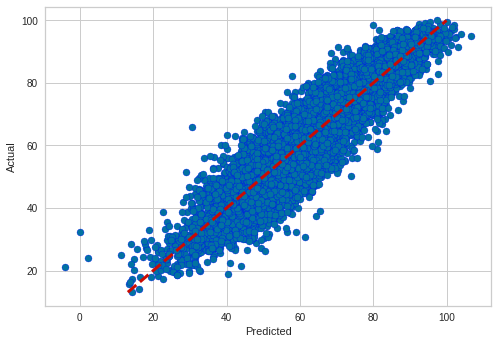

In [505]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test_all, edgecolors=(0, 0, 1))
ax.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


#### LR 1: Model evaluation metrics

In [506]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.892285786802766
MSE is 38.87333156327383
RMSE is 6.234848158798563
R2 score is 0.842362756688285
Adj R2 score is 0.8395898813730133


### LR 2: Model with high correlation variables (corr > |0.5|)

In [507]:
corr = df_broadband_tr.corr()
edu_corr = corr['pct_pop_hs+']

In [508]:
## find variables with |correlation| > 0.5 
high_corr =edu_corr[abs(edu_corr)>0.5]
high_corr.sort_values(ascending=False)

pct_pop_hs+                            1.000000
pct_pop_bachelors+                     0.888712
pct_desktop_or_laptop                  0.776303
pct_pop_income_gt_100k                 0.710661
pct_tablet                             0.698570
pct_computing_device_with_broadband    0.689616
log_median_income                      0.684769
pct_internet_broadband_any_type        0.683735
pct_internet                           0.683164
median_income                          0.676618
pct_internet_cellular                  0.639092
pct_computing_device                   0.638943
pct_pop_gt_200k                        0.636543
pct_pop_150k_thru_200k                 0.608908
log_median_house_value                 0.578137
pct_smartphone                         0.577029
pct_health_ins_19_64                   0.572022
median_rent                            0.512943
pct_pop_125k_thru_150k                 0.503278
pct_computing_device_no_internet      -0.521311
poverty_rate                          -0

In [509]:
#combine both positively and negatively correlated variables with corr >0.5
var_high_corr = high_corr.index.tolist()
print(var_high_corr)

['median_income', 'pct_health_ins_19_64', 'poverty_rate', 'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet', 'pct_internet_broadband_any_type', 'pct_internet_cellular', 'pct_internet_none', 'pct_computing_device', 'pct_computing_device_with_broadband', 'pct_computing_device_no_internet', 'pct_no_computing_device', 'pct_pop_ssi_households', 'pct_pop_125k_thru_150k', 'pct_pop_150k_thru_200k', 'pct_pop_gt_200k', 'SE', 'INFA', 'DDI', 'pct_pop_income_lt_50k', 'pct_pop_income_lt_30k', 'pct_pop_income_gt_100k', 'median_rent', 'log_median_income', 'log_median_house_value', 'pct_desktop_or_laptop', 'pct_smartphone', 'pct_only_smartphone', 'pct_tablet']


In [510]:
#limit the dataset to only the relevant variables

ind_var = [e for e in var_high_corr if e not in to_drop]

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [511]:
lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

LinearRegression()

In [512]:
y_pred = lr_2.predict(X_test)

y_pred

array([[54.92531191],
       [51.71708133],
       [60.69185313],
       ...,
       [52.68924513],
       [44.19223803],
       [53.30435121]])

In [513]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_2.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000154
1,pct_health_ins_19_64,0.278909
2,poverty_rate,-0.075842
3,pct_internet,0.171341
4,pct_internet_broadband_any_type,-0.264481
5,pct_internet_cellular,0.150283
6,pct_computing_device,-0.408473
7,pct_computing_device_with_broadband,0.649400
8,pct_computing_device_no_internet,0.673379
9,pct_no_computing_device,0.408473


#### LR 2: Model evaluation metrics

In [514]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.652276038003812
MSE is 71.14360096536953
RMSE is 8.434666618507784
R2 score is 0.7115019298720218
Adj R2 score is 0.7064271825575212


we can see that the metrics dropped pretty significantly.

### LR 3: Adding all broadband-related variables in addition to the above high correlation variables

In [515]:
#limit the dataset to only the relevant variables

for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [516]:
ind_var

['median_income',
 'pct_health_ins_19_64',
 'poverty_rate',
 'pct_internet',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_computing_device',
 'pct_computing_device_with_broadband',
 'pct_computing_device_no_internet',
 'pct_no_computing_device',
 'pct_pop_ssi_households',
 'pct_pop_125k_thru_150k',
 'pct_pop_150k_thru_200k',
 'pct_pop_gt_200k',
 'pct_pop_income_lt_50k',
 'pct_pop_income_lt_30k',
 'pct_pop_income_gt_100k',
 'median_rent',
 'log_median_income',
 'log_median_house_value',
 'pct_desktop_or_laptop',
 'pct_smartphone',
 'pct_only_smartphone',
 'pct_tablet',
 'pct_only_cellular',
 'pct_internet_broadband_satellite']

In [517]:
lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)
y_pred = lr_3.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_3.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000154
1,pct_health_ins_19_64,0.268932
2,poverty_rate,-0.075397
3,pct_internet,0.210841
4,pct_internet_broadband_any_type,-0.332307
5,pct_internet_cellular,0.171590
6,pct_computing_device,-0.341737
7,pct_computing_device_with_broadband,0.559411
8,pct_computing_device_no_internet,0.566274
9,pct_no_computing_device,0.341737


#### LR3: Model evaluation metrics

In [518]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.620094885045002
MSE is 70.34384249362928
RMSE is 8.387123612635579
R2 score is 0.7147450715254484
Adj R2 score is 0.7097273718175019


As expected, these newly added boradband variables are not adding much improvement to the model.

### LR 4: Adding interesting broadband vars

In [519]:
#limit the dataset to only the relevant variables

for word in br_interest_vars:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [520]:
lr_4 = LinearRegression()
lr_4.fit(X_train, y_train)
y_pred = lr_4.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_4.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000153
1,pct_health_ins_19_64,0.260819
2,poverty_rate,-0.078104
3,pct_internet,0.131695
4,pct_internet_broadband_any_type,-0.187035
5,pct_internet_cellular,0.165848
6,pct_computing_device,-0.356044
7,pct_computing_device_with_broadband,0.547555
8,pct_computing_device_no_internet,0.593027
9,pct_no_computing_device,0.356044


In [521]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.5713698591163885
MSE is 69.34203517345486
RMSE is 8.327186510067783
R2 score is 0.7188075518411565
Adj R2 score is 0.7138613120950157


### Use Cross-Validation to evaluate model performance

In [522]:
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_4, X_shuffle, y_shuffle,
                         scoring="neg_mean_squared_error",
                         cv=5, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))


RMSE values:  [8.4  8.36 8.37 8.42 8.4 ]
RMSE average:  8.390106210680138


## Random Forest

### RF 1: Include all variables

In [523]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
rf_rg.fit(X_train_all, y_train_all)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(random_state=0)

In [524]:
y_pred = rf_rg.predict(X_test_all)
y_pred

array([57.51800587, 51.52537253, 59.27785322, ..., 47.95306448,
       47.26413028, 56.70961526])

In [525]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.798563900813413
MSE is 37.41515772242122
RMSE is 6.11679309135279
R2 score is 0.8482758723204533
Adj R2 score is 0.8456070100672495


#### Feature importance

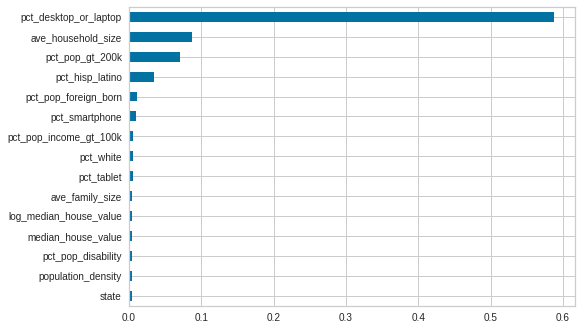

In [526]:
(pd.Series(rf_rg.feature_importances_, index=X_test_all.columns)
   .nlargest(15)[::-1]
   .plot(kind='barh')
   )  
   

In [527]:
top_vars_rf = (pd.Series(rf_rg.feature_importances_, index=X_test_all.columns).nlargest(10)[:-1])
print(top_vars_rf)

pct_desktop_or_laptop     0.587839
ave_household_size        0.087732
pct_pop_gt_200k           0.070868
pct_hisp_latino           0.034301
pct_pop_foreign_born      0.010583
pct_smartphone            0.009667
pct_pop_income_gt_100k    0.005572
pct_white                 0.005373
pct_tablet                0.005295
dtype: float64


### RF 2: Only the top 10 features + broadband var set 1

In [528]:
top_vars_rf_list = top_vars_rf.index.tolist()
print(top_vars_rf_list)

['pct_desktop_or_laptop', 'ave_household_size', 'pct_pop_gt_200k', 'pct_hisp_latino', 'pct_pop_foreign_born', 'pct_smartphone', 'pct_pop_income_gt_100k', 'pct_white', 'pct_tablet']


In [529]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_rf_list if e not in ('pct_pop_hs+','pct_pop_bachelors+')]
for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [530]:
ind_var

['pct_desktop_or_laptop',
 'ave_household_size',
 'pct_pop_gt_200k',
 'pct_hisp_latino',
 'pct_pop_foreign_born',
 'pct_smartphone',
 'pct_pop_income_gt_100k',
 'pct_white',
 'pct_tablet',
 'pct_internet',
 'pct_only_cellular',
 'pct_computing_device_no_internet',
 'pct_internet_broadband_satellite',
 'pct_computing_device_with_broadband',
 'log_median_income',
 'ruca_metro',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [531]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg2 = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
rf_rg2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(random_state=0)

In [532]:
y_pred = rf_rg2.predict(X_test)
y_pred

array([57.7424631 , 50.42329824, 59.37156758, ..., 48.27416241,
       49.64930116, 55.83184522])

In [533]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 5.025090503604424
MSE is 40.96658401395071
RMSE is 6.4005143554210315
R2 score is 0.833874301168513
Adj R2 score is 0.8309521119710579


In [534]:
top_vars_rf2 = (pd.Series(rf_rg2.feature_importances_, index=X_test.columns).nlargest(35)[:-1])
print(top_vars_rf2)

pct_desktop_or_laptop                      0.598044
ave_household_size                         0.102022
pct_pop_gt_200k                            0.080562
pct_hisp_latino                            0.042874
pct_smartphone                             0.022881
pct_pop_foreign_born                       0.020500
pct_white                                  0.016933
pct_pop_income_gt_100k                     0.015471
pct_pop_disability                         0.015170
pct_tablet                                 0.014818
log_median_income_over_log_median_house    0.014769
log_median_income                          0.012991
pct_internet_broadband_satellite           0.010322
pct_only_cellular                          0.009845
pct_computing_device_no_internet           0.008295
pct_computing_device_with_broadband        0.006848
pct_internet                               0.006567
ruca_metro                                 0.000786
dtype: float64


In [535]:
pd.DataFrame({'Variables':top_vars_rf2.index, 'Importance':top_vars_rf2.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.598044
1,ave_household_size,0.102022
2,pct_pop_gt_200k,0.080562
3,pct_hisp_latino,0.042874
4,pct_smartphone,0.022881
5,pct_pop_foreign_born,0.020500
6,pct_white,0.016933
7,pct_pop_income_gt_100k,0.015471
8,pct_pop_disability,0.015170
9,pct_tablet,0.014818


### RF 3: Only the top 10 features + broadband var set 2

In [536]:
#limit the dataset to only the relevant variables

ind_var_rf3 = [e for e in top_vars_rf_list if e not in ('pct_pop_hs+','pct_pop_bachelors+')]
for word in br_interest_vars:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)

for word in important_cov:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)
        
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var_rf3]
X_test = X_test_all[ind_var_rf3]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [537]:
ind_var_rf3

['pct_desktop_or_laptop',
 'ave_household_size',
 'pct_pop_gt_200k',
 'pct_hisp_latino',
 'pct_pop_foreign_born',
 'pct_smartphone',
 'pct_pop_income_gt_100k',
 'pct_white',
 'pct_tablet',
 'pct_internet',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'pct_computing_device',
 'pct_internet_broadband_any_type',
 'log_median_income',
 'ruca_metro',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [538]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg3 = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
rf_rg3.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(random_state=0)

In [539]:
y_pred = rf_rg3.predict(X_test)
y_pred

array([56.81344413, 49.54715081, 58.4782814 , ..., 49.04613206,
       49.68532081, 55.01069621])

In [540]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.988647922432882
MSE is 40.42839210993324
RMSE is 6.358332494446421
R2 score is 0.8360567507994099
Adj R2 score is 0.8331729513922176


In [541]:
top_vars_rf3 = (pd.Series(rf_rg3.feature_importances_, index=X_test.columns).nlargest(25)[:-1])
print(top_vars_rf3)

pct_desktop_or_laptop                      0.598024
ave_household_size                         0.102209
pct_pop_gt_200k                            0.080772
pct_hisp_latino                            0.043047
pct_smartphone                             0.022173
pct_pop_foreign_born                       0.020445
pct_white                                  0.017110
pct_pop_income_gt_100k                     0.015800
pct_pop_disability                         0.015394
pct_tablet                                 0.014977
log_median_income_over_log_median_house    0.014972
log_median_income                          0.013352
Ookla Median Download Speed (Mbps)         0.010669
pct_computing_device                       0.009736
pct_internet_broadband_any_type            0.006600
pct_internet                               0.006372
All_Provider_Count_25                      0.003767
All_Provider_Count_100                     0.003529
ruca_metro                                 0.000766
dtype: float

In [542]:
pd.DataFrame({'Variables':top_vars_rf3.index, 'Importance':top_vars_rf3.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.598024
1,ave_household_size,0.102209
2,pct_pop_gt_200k,0.080772
3,pct_hisp_latino,0.043047
4,pct_smartphone,0.022173
5,pct_pop_foreign_born,0.020445
6,pct_white,0.017110
7,pct_pop_income_gt_100k,0.015800
8,pct_pop_disability,0.015394
9,pct_tablet,0.014977


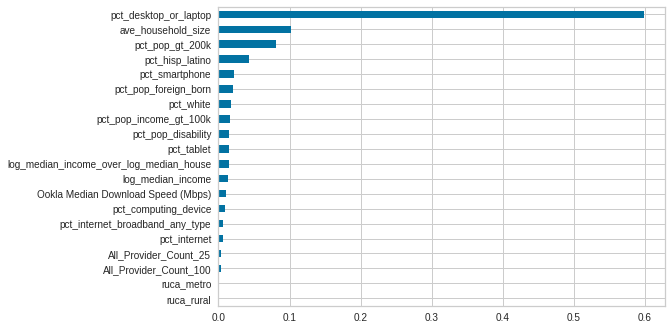

In [543]:
(pd.Series(rf_rg3.feature_importances_, index=X_test.columns)
   .nlargest(30)[::-1]
   .plot(kind='barh')
   )  

### Hyperparameter Tuning

In [74]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_rg3.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 0)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'max_depth' : [2,5,10],
    'criterion' :['squared_error']
}

In [ ]:
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)

In [ ]:
GSCV.best_params_

In [ ]:
random_forest_tuned = RandomForestRegressor(criterion= 'squared_error',max_depth= 10,max_features= 'auto',n_estimators =500,random_state = 0)
random_forest_tuned.fit(X_train, y_train)
y_pred = random_forest_tuned.predict(X_test)

In [ ]:
# model evaluation for testing set
regression_results(y_test, y_pred)

## XGBoost

### XGB 1: Include all variables

In [544]:
print(xgb.__version__)

1.5.1


In [545]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2500)

In [546]:
xg_reg.fit(X_train_all,y_train_all)
y_pred = xg_reg.predict(X_test_all)

In [547]:
# model evaluation for testing set
regression_results(y_test_all, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.150180686507211
MSE is 28.061184307145172
RMSE is 5.297280840879137
R2 score is 0.8862076503260276
Adj R2 score is 0.8842060167599433


#### Feature Importance

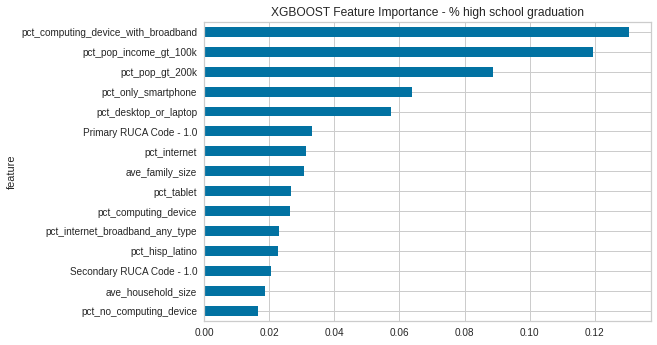

In [548]:
(pd.Series(xg_reg.feature_importances_, index=X_test_all.columns)
   .nlargest(15)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   )  


### XGB 2: Only the top 15 features + broadband var set 1

In [549]:
top_vars = (pd.Series(xg_reg.feature_importances_, index=X_test_all.columns).nlargest(15)[:-1])
print(top_vars)

pct_computing_device_with_broadband    0.130630
pct_pop_income_gt_100k                 0.119504
pct_pop_gt_200k                        0.088792
pct_only_smartphone                    0.063768
pct_desktop_or_laptop                  0.057279
Primary RUCA Code - 1.0                0.033235
pct_internet                           0.031197
ave_family_size                        0.030611
pct_tablet                             0.026650
pct_computing_device                   0.026376
pct_internet_broadband_any_type        0.023110
pct_hisp_latino                        0.022785
Secondary RUCA Code - 1.0              0.020460
ave_household_size                     0.018802
dtype: float32


In [550]:
top_vars_list_xg = top_vars.index.tolist()
print(top_vars_list_xg)

['pct_computing_device_with_broadband', 'pct_pop_income_gt_100k', 'pct_pop_gt_200k', 'pct_only_smartphone', 'pct_desktop_or_laptop', 'Primary RUCA Code - 1.0', 'pct_internet', 'ave_family_size', 'pct_tablet', 'pct_computing_device', 'pct_internet_broadband_any_type', 'pct_hisp_latino', 'Secondary RUCA Code - 1.0', 'ave_household_size']


In [551]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_list_xg if e not in to_drop]
for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [552]:
ind_var

['pct_computing_device_with_broadband',
 'pct_pop_income_gt_100k',
 'pct_pop_gt_200k',
 'pct_only_smartphone',
 'pct_desktop_or_laptop',
 'Primary RUCA Code - 1.0',
 'pct_internet',
 'ave_family_size',
 'pct_tablet',
 'pct_computing_device',
 'pct_internet_broadband_any_type',
 'pct_hisp_latino',
 'Secondary RUCA Code - 1.0',
 'ave_household_size',
 'pct_only_cellular',
 'pct_computing_device_no_internet',
 'pct_internet_broadband_satellite',
 'log_median_income',
 'ruca_metro',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_foreign_born',
 'pct_pop_disability']

In [553]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [554]:
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 5.0336870935046
MSE is 41.208316877279444
RMSE is 6.419370442440555
R2 score is 0.8328940378193075
Adj R2 score is 0.8299546055643974


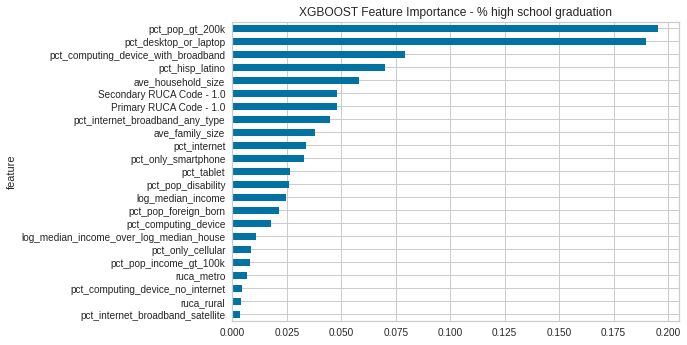

In [555]:
(pd.Series(xg_reg.feature_importances_, index=X_test.columns)
   .nlargest(50)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   ) 

In [556]:
top_vars = pd.Series(xg_reg.feature_importances_, index=X_test.columns).nlargest(50)[:-1]
pd.DataFrame({'Variables':top_vars.index, 'Importance':top_vars.values})


,Variables,Importance
0,pct_pop_gt_200k,0.195175
1,pct_desktop_or_laptop,0.189677
2,pct_computing_device_with_broadband,0.079315
3,pct_hisp_latino,0.069823
4,ave_household_size,0.058193
5,Secondary RUCA Code - 1.0,0.048220
6,Primary RUCA Code - 1.0,0.047955
7,pct_internet_broadband_any_type,0.044911
8,ave_family_size,0.037723
9,pct_internet,0.033925


### XGB3: Only the top 10 features + broadband var set 2

In [557]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_list_xg if e not in to_drop]
for word in br_interest_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)
        
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [558]:
ind_var

['pct_computing_device_with_broadband',
 'pct_pop_income_gt_100k',
 'pct_pop_gt_200k',
 'pct_only_smartphone',
 'pct_desktop_or_laptop',
 'Primary RUCA Code - 1.0',
 'pct_internet',
 'ave_family_size',
 'pct_tablet',
 'pct_computing_device',
 'pct_internet_broadband_any_type',
 'pct_hisp_latino',
 'Secondary RUCA Code - 1.0',
 'ave_household_size',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'log_median_income',
 'ruca_metro',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_foreign_born',
 'pct_pop_disability']

In [559]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [560]:
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.9684120931747735
MSE is 40.10400101117123
RMSE is 6.332771984776589
R2 score is 0.8373722058043525
Adj R2 score is 0.8345115455528249


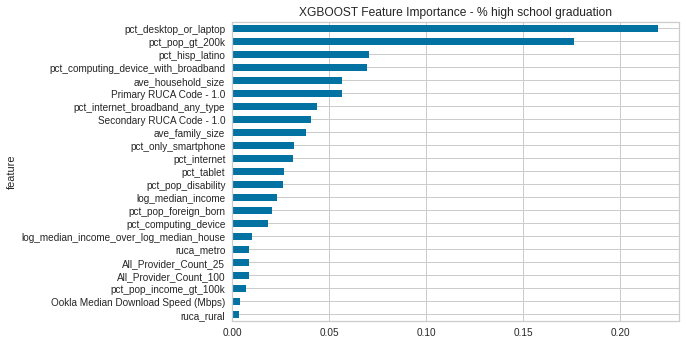

In [561]:
(pd.Series(xg_reg.feature_importances_, index=X_test.columns)
   .nlargest(90)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   ) 

In [562]:
top_vars = pd.Series(xg_reg.feature_importances_, index=X_test.columns).nlargest(50)[:-1]
pd.DataFrame({'Variables':top_vars.index, 'Importance':top_vars.values})

,Variables,Importance
0,pct_desktop_or_laptop,0.219342
1,pct_pop_gt_200k,0.176430
2,pct_hisp_latino,0.070617
3,pct_computing_device_with_broadband,0.069638
4,ave_household_size,0.056638
5,Primary RUCA Code - 1.0,0.056424
6,pct_internet_broadband_any_type,0.043387
7,Secondary RUCA Code - 1.0,0.040503
8,ave_family_size,0.037918
9,pct_only_smartphone,0.032004


#### Hyperparameter Tuning

In [575]:
params = { 'max_depth': [5, 10],
           'learning_rate': [0.1,0.5],
           'n_estimators': [2500,5000],
           'colsample_bytree': [0.3, 0.5]}

regressor_tuned = xgb.XGBRegressor()

regress = RandomizedSearchCV(estimator=regressor_tuned, 
                             param_distributions=params,
                             scoring='neg_mean_squared_error', 
                             verbose=10,
                             n_iter = 20,
                             cv = 3,
                             random_state=42)

regress.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500
[CV 1/3; 1/16] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500;, score=-42.162 total time=  27.8s
[CV 2/3; 1/16] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500
[CV 2/3; 1/16] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500;, score=-41.108 total time=  27.6s
[CV 3/3; 1/16] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500
[CV 3/3; 1/16] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500;, score=-42.067 total time=  27.9s
[CV 1/3; 2/16] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=5000
[CV 1/3; 2/16] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=5000;, score=-43.084 total time=  54.3s
[CV 2/3; 2/16] START colsample_bytree=0.3, learning_rate=0.1, m

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [576]:
print("Best parameters:", regress.best_params_)
print("Lowest RMSE: ", (-regress.best_score_)**(1/2.0))
y_pred = regress.predict(X_test)

regression_results(y_test, y_pred)

Best parameters: {'n_estimators': 2500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
Lowest RMSE:  6.463668910264943
The model performance for testing set
--------------------------------------
MAE is 4.953289864027797
MSE is 40.11716221395149
RMSE is 6.333811033963003
R2 score is 0.8398602755073117
Adj R2 score is 0.8376129864193245


#Best Model

### So far, best model is XGB with broadband set 2



In [563]:
## using actual test dataset

X_test= df_broadband_test[ind_var]
y_test= df_broadband_test[target]

In [564]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [565]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.905569176183933
MSE is 39.55977732942254
RMSE is 6.289656376100568
R2 score is 0.8420852449946553
Adj R2 score is 0.8398691795750355


In [566]:
with open('education_xgb_model.pkl', 'wb') as file:
    pickle.dump(xg_reg, file)

# Error Analysis

In [567]:
## transfer to np array for error analysis

X_train_1 = np.squeeze(np.asarray(X_train))
y_train_1 = np.squeeze(np.asarray(y_train))
X_test_1 = np.squeeze(np.asarray(X_test))
y_test_1 = np.squeeze(np.asarray(y_test))

In [568]:
xg_reg.fit(X_train_1,y_train_1)
y_pred_1 = xg_reg.predict(X_test_1)

In [569]:
# model evaluation for testing set
regression_results(y_test_1, y_pred_1)

The model performance for testing set
--------------------------------------
MAE is 4.905569176183933
MSE is 39.55977732942254
RMSE is 6.289656376100568
R2 score is 0.8420852449946553
Adj R2 score is 0.8398691795750355


In [570]:
## import error analysis library
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import cooks_distance
import scipy.stats as stats

## Residual plot

The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

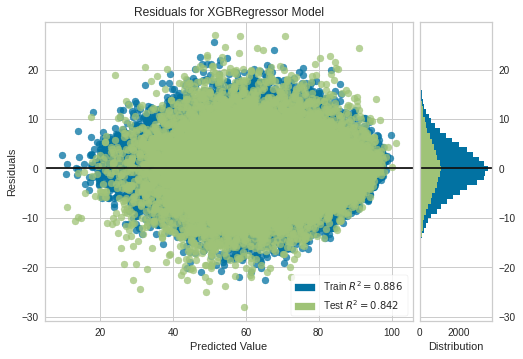

In [571]:
visualizer = ResidualsPlot(xg_reg)

visualizer.fit(X_train_1, y_train_1)  # Fit the training data to the visualizer
visualizer.score(X_test_1, y_test_1)  # Evaluate the model on the test data
visualizer.show()  

### Interpretations

In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

## Prediction Error Plot

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.


Prediction Error Plot


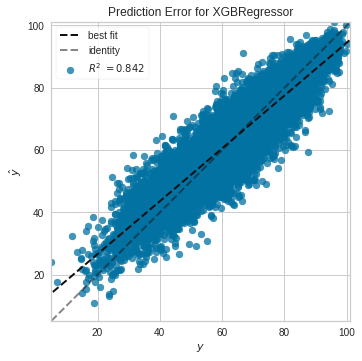

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2cae9d910>,
                estimator=XGBRegressor(alpha=10, base_score=0.5,
                                       booster='gbtree', colsample_bylevel=1,
                                       colsample_bynode=1, colsample_bytree=0.3,
                                       enable_categorical=False, gamma=0,
                                       gpu_id=-1, importance_type=None,
                                       interaction_constraints='',
                                       learning_rate=0.1, max_delta_step=0,
                                       max_depth=3, min_child_weight=1,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=2500, n_jobs=8,
                                       num_parallel_tree=1, predictor='auto',
                                       random_state=0, reg_alpha=10,
                                    

In [572]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xg_reg, X_train_1, y_train_1, X_test_1, y_test_1))


### Interpretations

We can see that most of the points are on a straight line. We can compare this plot against the 45-degree line, where the prediction exactly matches the model. In general, the predictions follow the actualS.

## Cook's distance

Cook’s Distance is a measure of how influential an instance is to the computation of a regression, e.g. if the instance is removed would the estimated coeficients of the underlying model be substantially changed? Because of this, Cook’s Distance is generally used to detect outliers in standard, OLS regression. In fact, a general rule of thumb is that D(i) > 4/n is a good threshold for determining highly influential points as outliers and this visualizer can report the percentage of data that is above that threshold.

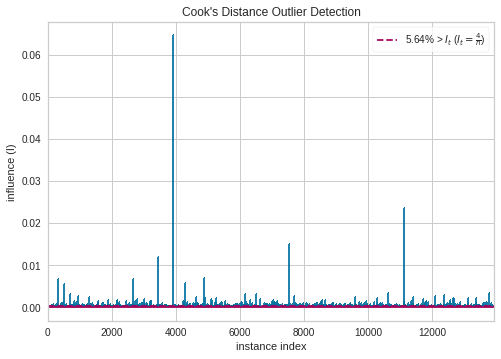

CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2cac92cd0>)

In [573]:
cooks_distance(
    X_test_1, y_test_1,
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
)

In particular, there are several (5.45%）of the observations with Cook’s distance values that are relatively higher than the others.

## Q-Q plot

To check the assumption of the normality of the data generating process, we can use Q-Q plot of the normalized residuals.

Text(0.5, 1.0, 'Normal Q-Q Plot')

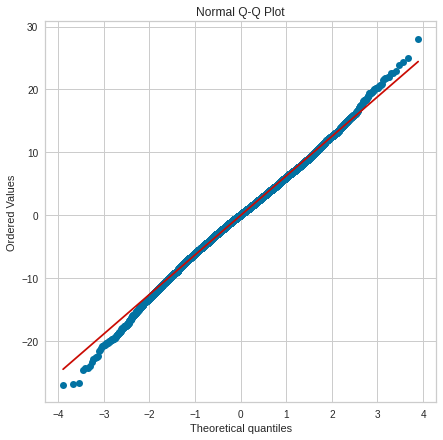

In [574]:
residuals = y_test["pct_pop_hs+"] - y_pred.reshape(-1)
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## Interpretations

We can see that the residuals are fitted to the line, although there are some outliers found at both end